# PERM Acceptance Rate Nation by Nation 2009 - 2016
## Regardless of their profession or the company they are applying to

## CONTENTS:

### IMPORTING DATA AND PULLING OUT RELEVANT COLUMNS
- EMPLOYER_NAME *
- EMPLOYER_STATE *
- CASE_STATUS *
- PW_SOC_CODE * 
- WAGE_OFFER_FROM_9089
- COUNTRY_OF_CITZENSHIP *

### PREPPING DATA FOR THE CLASSIFIER/PREDICTOR
- Creating Boolean value
- Merging with Soc code
- Turning words into numbers (*)

### WORKING ON THE PREDICTOR

### THE PREDICTOR OUTPUT
- Creating a list for check the users input



In [15]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import random

import requests
import urllib
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import tree, metrics
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
#from statsmodels.nonparametric import smoothers_lowes

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# IMPORTING DATA AND PULLING OUT RELEVANT COLUMNS

In [16]:
df = pd.read_excel("data/PERM_2015.xls")
df_2014 = pd.read_excel("data/PERM_2014.xls")
df_2013 = pd.read_excel("data/PERM_2013.xls")
df_2012 = pd.read_excel("data/PERM_2012.xls")
df_2011 = pd.read_excel("data/PERM_2011.xls")
df_2010 = pd.read_excel("data/PERM_2010.xls")
df_2009 = pd.read_excel("data/PERM_2009.xls")

[A link](https://docs.google.com/a/tamedia.com/spreadsheets/d/1lbmWfRqyOPvxiwkaC-XVgE5ClfqjNe9J-zSSe7GbVGQ/edit?usp=sharing) to the exact names of the colums I'll be using. They differ from year to year.

In [17]:
#Pulling out all the relevant columns, have to 
df_2015 = df[["EMPLOYER_NAME","EMPLOYER_STATE","CASE_STATUS","PW_SOC_CODE","WAGE_OFFER_FROM_9089","COUNTRY_OF_CITIZENSHIP"]].copy()
df_2014 = df_2014[["Employer_Name","Employer_State","Case_Status","PW_SOC_Code","WAGE_OFFERED_FROM_9089","Country_of_Citizenship"]].copy()
df_2013 = df_2013[["Employer_Name","Employer_State","Case_Status","PW_SOC_Code","WAGE_OFFERED_FROM_9089","Country_of_Citizenship"]].copy()
df_2012 = df_2012[["EMPLOYER_NAME","EMPLOYER_STATE","CASE_STATUS","PW_SOC_CODE","WAGE_OFFER_FROM_9089","COUNTRY_OF_CITZENSHIP"]].copy()
df_2011 = df_2011[["EMPLOYER_NAME","EMPLOYER_STATE","CASE_STATUS","PW_SOC_CODE","WAGE_OFFER_FROM_9089","COUNTRY_OF_CITZENSHIP"]].copy()
df_2010 = df_2010[["EMPLOYER_NAME","EMPLOYER_STATE","CASE_STATUS","PW_SOC_CODE","WAGE_OFFER_FROM_9089","COUNTRY_OF_CITZENSHIP"]].copy()
df_2009 = df_2009[["EMPLOYER NAME","EMPLOYER STATE","CASE STATUS","PW SOC CODE","WAGE OFFER FROM 9089","COUNTRY OF CITZENSHIP"]].copy()

In [18]:
#Renaming the columns
df_2015.columns = ["EMPLOYER_NAME","EMPLOYER_STATE","CASE_STATUS","PW_SOC_CODE","WAGE_OFFER_FROM_9089","COUNTRY_OF_CITZENSHIP"]
df_2014.columns = ["EMPLOYER_NAME","EMPLOYER_STATE","CASE_STATUS","PW_SOC_CODE","WAGE_OFFER_FROM_9089","COUNTRY_OF_CITZENSHIP"]
df_2013.columns = ["EMPLOYER_NAME","EMPLOYER_STATE","CASE_STATUS","PW_SOC_CODE","WAGE_OFFER_FROM_9089","COUNTRY_OF_CITZENSHIP"]
df_2012.columns = ["EMPLOYER_NAME","EMPLOYER_STATE","CASE_STATUS","PW_SOC_CODE","WAGE_OFFER_FROM_9089","COUNTRY_OF_CITZENSHIP"]
df_2011.columns = ["EMPLOYER_NAME","EMPLOYER_STATE","CASE_STATUS","PW_SOC_CODE","WAGE_OFFER_FROM_9089","COUNTRY_OF_CITZENSHIP"]
df_2010.columns = ["EMPLOYER_NAME","EMPLOYER_STATE","CASE_STATUS","PW_SOC_CODE","WAGE_OFFER_FROM_9089","COUNTRY_OF_CITZENSHIP"]
df_2009.columns = ["EMPLOYER_NAME","EMPLOYER_STATE","CASE_STATUS","PW_SOC_CODE","WAGE_OFFER_FROM_9089","COUNTRY_OF_CITZENSHIP"]

In [19]:
#joining them them all the tables:
df= pd.concat([df_2015, df_2014, df_2013, df_2012, df_2011, df_2010, df_2009], ignore_index=True)

# PREPPING DATA FOR THE CLASSIFIER/PREDICTOR

In [20]:
#TOTAL NUMBER OF APPLICATIONS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471341 entries, 0 to 471340
Data columns (total 6 columns):
EMPLOYER_NAME            471320 non-null object
EMPLOYER_STATE           471301 non-null object
CASE_STATUS              471341 non-null object
PW_SOC_CODE              470496 non-null object
WAGE_OFFER_FROM_9089     468130 non-null float64
COUNTRY_OF_CITZENSHIP    471265 non-null object
dtypes: float64(1), object(5)
memory usage: 21.6+ MB


In [21]:
df = df.dropna()

In [22]:
#creating Status boolean. 1=accepted, 2=not accepted.
def accepted(x):
    if x=='Certified':
        return 1
    elif x== 'Certified-Expired':
        return 1
    else:
        return 0

In [23]:
df['ACCEPTED'] = df['CASE_STATUS'].apply(accepted)
df[df['ACCEPTED'] == 1].count()

EMPLOYER_NAME            400810
EMPLOYER_STATE           400810
CASE_STATUS              400810
PW_SOC_CODE              400810
WAGE_OFFER_FROM_9089     400810
COUNTRY_OF_CITZENSHIP    400810
ACCEPTED                 400810
dtype: int64

In [29]:
#Merging with SOC Code
df_soc_major = pd.read_csv("data/SOC_Codes_major.csv")

In [24]:
def drop_occupations(x):
    return x.replace(' Occupations', '')

In [25]:
def first_two_digits(x):
    x = str(x)
    return x[:2]

In [27]:
df['SOC_CODE_first_2'] = df['PW_SOC_CODE'].apply(first_two_digits)

In [30]:
df_soc_major['SOC_CODE_first_two'] = df_soc_major['2018 SOC Code'].apply(first_two_digits)

In [31]:
df_soc_major['2018 SOC Title'] = df_soc_major['2018 SOC Title'].apply(drop_occupations)

In [32]:
#Documentation:
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html
df = df.merge(df_soc_major, how='outer', left_on = 'SOC_CODE_first_2', right_on = 'SOC_CODE_first_two')

In [33]:
# Turning Words into numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467375 entries, 0 to 467374
Data columns (total 11 columns):
EMPLOYER_NAME            467375 non-null object
EMPLOYER_STATE           467375 non-null object
CASE_STATUS              467375 non-null object
PW_SOC_CODE              467375 non-null object
WAGE_OFFER_FROM_9089     467375 non-null float64
COUNTRY_OF_CITZENSHIP    467375 non-null object
ACCEPTED                 467375 non-null int64
SOC_CODE_first_2         467375 non-null object
2018 SOC Code            459501 non-null object
2018 SOC Title           459501 non-null object
SOC_CODE_first_two       459501 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 42.8+ MB


In [34]:
df = df.dropna()

# WORKING ON THE PREDICTOR

In [35]:
#Learning the Employer's name
le_employer_name = preprocessing.LabelEncoder()

In [36]:
le_employer_name.fit(df['EMPLOYER_NAME'])

LabelEncoder()

In [37]:
#Encoding the Employer's name
df['EMPLOYER_NAME_label'] = le_employer_name.transform(df['EMPLOYER_NAME'])

In [38]:
#SOC Code
le_soc_code = preprocessing.LabelEncoder()

In [40]:
le_soc_code.fit(df['2018 SOC Title'])

LabelEncoder()

In [41]:
df['SOC_Title_label'] = le_soc_code.transform(df['2018 SOC Title'])

In [42]:
#COUNTRY_OF_CITZENSHIP
country_of_citizenship = preprocessing.LabelEncoder()

In [43]:
country_of_citizenship.fit(df['COUNTRY_OF_CITZENSHIP'])

LabelEncoder()

In [44]:
df['COUNTRY_OF_CITZENSHIP_label'] = country_of_citizenship.transform(df['COUNTRY_OF_CITZENSHIP'])

In [46]:
#Creating dataframe for the matrix (but will I still be able to transform values back? It seems to work)
df_matrix = df[['ACCEPTED', 'WAGE_OFFER_FROM_9089', 'EMPLOYER_NAME_label', 'SOC_Title_label', 'COUNTRY_OF_CITZENSHIP_label']].copy()

In [47]:
result_array = df_matrix.as_matrix()

In [48]:
x = result_array[:,1:]
y = result_array[:,0]

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [50]:
dt = dt.fit(x,y)

In [51]:
from sklearn.cross_validation import cross_val_score

In [52]:
scores = cross_val_score(dt,x,y,cv=10)

In [53]:
np.mean(scores)

0.56853309758732307

(0, 1)

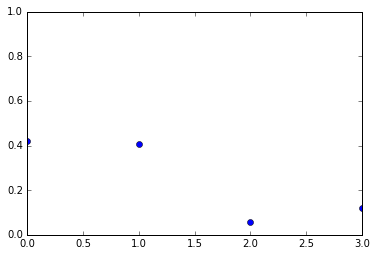

In [54]:
plt.plot(dt.feature_importances_,'o')
plt.ylim(0,1)

In [55]:
#Random Forest is impressively good

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42, test_size=0.20,train_size=0.80)

In [57]:
forest = RandomForestClassifier(n_estimators=100, random_state=100)
forest.fit(X_train, y_train)
dt = forest.fit(X_train, y_train)

In [58]:
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 0.957187
accuracy on test set: 0.852602


(0, 1)

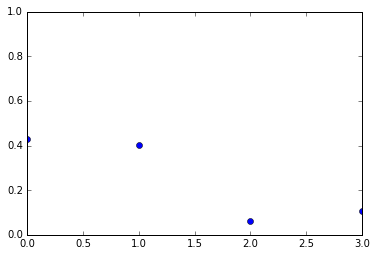

In [59]:
plt.plot(dt.feature_importances_,'o')
plt.ylim(0,1)

In [60]:
#Label Encoder Names

#le_employer_name   df['EMPLOYER_NAME_label']
#le_soc_code  df['SOC Title_label']
#country_of_citizenship   df['COUNTRY_OF_CITZENSHIP_label']

#And Wage

#'WAGE_OFFER_FROM_9089'
#'EMPLOYER_NAME_label', 
#'EMPLOYER_STATE_label',
#'le_soc_code'
#'COUNTRY_OF_CITZENSHIP_label'


'WAGE_OFFER_FROM_9089', 'EMPLOYER_NAME_label', 'SOC_Title_label', 'COUNTRY_OF_CITZENSHIP_label'

In [70]:
INDIA = country_of_citizenship.transform('INDIA')
round(forest.predict_proba([85072.0, 20, 20, INDIA])[0][1], 4)

/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0.76000000000000001

# Input for the Predictor Output

## General predictor with 4 parameters

In [109]:
#Country list 
country_list = list(set(df['COUNTRY_OF_CITZENSHIP'].tolist()))

In [110]:
#Employer list
employer_list = list(set(df['EMPLOYER_NAME'].tolist()))

In [118]:
#occupation_list
occupation_list = list(set(df['2018 SOC Title'].tolist()))

In [111]:
# "Computer Systems Analysts" is the most common job for foreigners applying for Green Cards. Since 2009 
# approximately every fifth Green Card issued was for somebody in one of these two professions. Type "1" 
# to pick this profession or, 2 to pick a random profession from 647 professions in the data.
profession_list = list(set(df['2018 SOC Title'].tolist()))

In [151]:
print("Compare the chances of getting a visa based on data from nearly half a million visa applications since 2009.")
country = input("Which country are you from? Please use all caps. ")
employer = input("Which company is hiring you? Please us all caps. (e.g. MICROSOFT CORPORATION, APPLE INC., BLOOMBERG L.P.) ")
occupation = input("What's your occupation? (e.g. Computer and Mathematical, Architecture and Engineering, Management, Food Preparation and Serving Related ")
wage = input("What's your expected yearly salary? ")

Compare the chances of getting a visa as in a computer or mathematical occupation. These professions account for approximately one eigth of all green cards issued since 2009. 
Which country are you from? Please use all caps. SWITZERLAND
Which company is hiring you? Please us all caps. (e.g. MICROSOFT CORPORATION, APPLE INC., BLOOMBERG L.P.) MICROSOFT CORPORATION
What's your occupation? (e.g. Computer and Mathematical, Architecture and Engineering, Management, Food Preparation and Serving Related Management
What's your expected yearly salary? 200000


In [152]:
if country in country_list:
    country_name = country
    country = country_of_citizenship.transform(country)
else:
    print('Please check your spelling or caps for the selected country.')
    
if employer in employer_list:
    employer_name = employer
    employer = le_employer_name.transform(employer)
else:
    print('Please check your spelling or caps for the selected employer.')
    
if occupation in occupation_list:
    occupation_name = occupation
    occupation = le_soc_code.transform(occupation)
else:
    print('Please check your spelling or caps for the selected occupation.')
    
try:
    x = forest.predict_proba([wage, occupation, employer, country])[0][1]
    print("As a citizen from", country_name, "earning $", wage, "a year, working for", employer_name, \
          "and working in a", occupation_name, "occupation, your chances of getting a Green Card in the US are: {0:.1f}%.".format(x*100))
except: 
    'ValueError'

As a citizen from SWITZERLAND earning $ 200000 a year, working for MICROSOFT CORPORATION and working in a Management occupation, your chances of getting a Green Card in the US are: 29.0%.


/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## Comparative Predictor
Input: where you enter Nationality and wage (computer profession, 130'000k a year and as company are given Microsoft are given.

In [184]:
print("Compare the chances of three different nationalities for a Green Card, would they be hired as software developers earning 130000 USD a year working for Microsoft.")
country1 = input("Pick your first country: ")
country2 = input("Your second one: ")
country3 = input("And your third: ")

Compare the chances of three different nationalities for a Green Card, would they be hired as software developers earning 130000 USD a year working for Microsoft.
Pick your first country: MONGOLIA
Your second one: ECUADOR
And your third: GUATEMALA


In [185]:
if country1 in country_list:
    country_name1 = country1
    country1 = country_of_citizenship.transform(country1)
else:
    print('Please check your spelling or caps for your first selected country.')
    
if country2 in country_list:
    country_name2 = country2
    country2 = country_of_citizenship.transform(country2)
else:
    print('Please check your spelling or caps for your second selected country.')
    
if country3 in country_list:
    country_name3 = country3
    country3 = country_of_citizenship.transform(country3)
else:
    print('Please check your spelling or caps for your third selected country.')
    
try:
    x1 = forest.predict_proba([130000, 5, 3778, country1])[0][1]
    x2 = forest.predict_proba([130000, 5, 3778, country2])[0][1]
    x3 = forest.predict_proba([100000, 5, 3778, country3])[0][1]
    print(country_name1, ": {0:.1f}%.".format(x1*100))
    print(country_name2, ": {0:.1f}%.".format(x2*100))
    print(country_name3, ": {0:.1f}%.".format(x2*100))
except: 
    'ValueError'



MONGOLIA : 71.5%.
ECUADOR : 89.0%.
GUATEMALA : 89.0%.


/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [ ]:
import pickle

classifier = RandomForestClassifier(etc)
output = open('classifier.pkl', 'wb')
pickle.dump(classifier, output)
output.close()

In [117]:
df['2018 SOC Title'].value_counts()

Computer and Mathematical                         228424
Architecture and Engineering                       45370
Management                                         32692
Business and Financial Operations                  29350
Educational Instruction and Library                25235
Healthcare Practitioners and Technical             21482
Life, Physical, and Social Science                 14076
Food Preparation and Serving Related               10697
Production                                         10324
Arts, Design, Entertainment, Sports, and Media      7743
Sales and Related                                   5918
Construction and Extraction                         5831
Office and Administrative Support                   4241
Building and Grounds Cleaning and Maintenance       3333
Installation, Maintenance, and Repair               2717
Community and Social Service                        2448
Healthcare Support                                  2443
Personal Care and Service      

In [161]:
df[df['EMPLOYER_NAME'] == 'THE UNIVERSITY OF OKLAHOMA']

,EMPLOYER_NAME,EMPLOYER_STATE,CASE_STATUS,PW_SOC_CODE,WAGE_OFFER_FROM_9089,COUNTRY_OF_CITZENSHIP,ACCEPTED,SOC_CODE_first_2,2018 SOC Code,2018 SOC Title,SOC_CODE_first_two,EMPLOYER_NAME_label,SOC_Title_label,COUNTRY_OF_CITZENSHIP_label
0,THE UNIVERSITY OF OKLAHOMA,OKLAHOMA,Certified-Expired,25-1032,86000.00,PERU,1,25,25-0000,Educational Instruction and Library,25,94471,7,139
1,THE UNIVERSITY OF OKLAHOMA,OKLAHOMA,Certified-Expired,25-1032,87000.00,CHINA,1,25,25-0000,Educational Instruction and Library,25,94471,7,40
2,THE UNIVERSITY OF OKLAHOMA,OKLAHOMA,Certified-Expired,25-1081,58000.00,SOUTH KOREA,1,25,25-0000,Educational Instruction and Library,25,94471,7,164
3,THE UNIVERSITY OF OKLAHOMA,OKLAHOMA,Certified,25-1193,63000.00,CHINA,1,25,25-0000,Educational Instruction and Library,25,94471,7,40
4,THE UNIVERSITY OF OKLAHOMA,OKLAHOMA,Certified,25-1032,85000.00,IRAN,1,25,25-0000,Educational Instruction and Library,25,94471,7,81
5,THE UNIVERSITY OF OKLAHOMA,OKLAHOMA,Certified-Expired,25-1032,80000.00,CHINA,1,25,25-0000,Educational Instruction and Library,25,94471,7,40
6,THE UNIVERSITY OF OKLAHOMA,OKLAHOMA,Certified-Expired,25-1053,70000.00,GERMANY,1,25,25-0000,Educational Instruction and Library,25,94471,7,65
7,THE UNIVERSITY OF OKLAHOMA,OKLAHOMA,Certified-Expired,25-1053,90000.00,POLAND,1,25,25-0000,Educational Instruction and Library,25,94471,7,142
8,THE UNIVERSITY OF OKLAHOMA,OKLAHOMA,Certified-Expired,25-1051,75000.00,UNITED KINGDOM,1,25,25-0000,Educational Instruction and Library,25,94471,7,191
9,THE UNIVERSITY OF OKLAHOMA,OKLAHOMA,Certified,25-1053,79000.00,COLOMBIA,1,25,25-0000,Educational Instruction and Library,25,94471,7,41


In [169]:
df['EMPLOYER_NAME'].value_counts()

MICROSOFT CORPORATION                                 13170
COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION          7115
INTEL CORPORATION                                      5033
GOOGLE INC.                                            3778
CISCO SYSTEMS, INC.                                    2666
AMAZON CORPORATE LLC                                   2416
APPLE INC.                                             2057
ORACLE AMERICA, INC.                                   1816
QUALCOMM, INC.                                         1783
INFOSYS LTD.                                           1668
YAHOO! INC.                                            1470
DELOITTE CONSULTING LLP                                1363
IBM CORPORATION                                        1271
BROADCOM CORPORATION                                   1202
HCL AMERICA INC.                                       1124
WIPRO LIMITED                                          1118
BLOOMBERG L.P.                          

# Looping through with every country

In [314]:
List_Software_Developer = [] # Check on list size
Wage = 120000

for x in country_list:
    if x in country_list:
        country_name = x
        country = country_of_citizenship.transform(x)
    else:
        pass

    try:
        x = forest.predict_proba([wage, 20, 554, country])[0][1]
        x = x * 100
    except: 
        'ValueError'
    
    Country_dict = {'Country Name': country_name,
                   'Visa Chance': x}
    List_Software_Developer.append(Country_dict)

    

/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local

In [364]:
df_software_dev_chance = pd.DataFrame(List_Software_Developer)

In [365]:
df_software_dev_chance.sort_values(by='Visa Chance', ascending=True).head()

,Country Name,Visa Chance
73,UZBEKISTAN,66.833333
31,UNITED STATES OF AMERICA,67.166667
21,URUGUAY,67.166667
120,ZIMBABWE,68.333333
47,ZAMBIA,68.333333


In [86]:
df[df['SOC_Title_label'] == 1].head(1)

,EMPLOYER_NAME,EMPLOYER_STATE,CASE_STATUS,PW_SOC_CODE,WAGE_OFFER_FROM_9089,COUNTRY_OF_CITZENSHIP,ACCEPTED,SOC_CODE_first_2,2018 SOC Code,2018 SOC Title,SOC_CODE_first_two,EMPLOYER_NAME_label,SOC_Title_label,COUNTRY_OF_CITZENSHIP_label
416778,THE CHINA PRESS,NEW YORK,Certified-Expired,27-3022.00,14.9,CHINA,1,27,27-0000,"Arts, Design, Entertainment, Sports, and Media",27,93252,1,40


In [88]:
df[df['SOC_Title_label'] == 2].head(1)

,EMPLOYER_NAME,EMPLOYER_STATE,CASE_STATUS,PW_SOC_CODE,WAGE_OFFER_FROM_9089,COUNTRY_OF_CITZENSHIP,ACCEPTED,SOC_CODE_first_2,2018 SOC Code,2018 SOC Title,SOC_CODE_first_two,EMPLOYER_NAME_label,SOC_Title_label,COUNTRY_OF_CITZENSHIP_label
345571,VICTOR POGREBNIAK LAVI LLC.,NEW JERSEY,Denied,37-3011.00,14.41,ECUADOR,0,37,37-0000,Building and Grounds Cleaning and Maintenance,37,100387,2,53


In [89]:
df[df['SOC_Title_label'] == 3].head(1)

,EMPLOYER_NAME,EMPLOYER_STATE,CASE_STATUS,PW_SOC_CODE,WAGE_OFFER_FROM_9089,COUNTRY_OF_CITZENSHIP,ACCEPTED,SOC_CODE_first_2,2018 SOC Code,2018 SOC Title,SOC_CODE_first_two,EMPLOYER_NAME_label,SOC_Title_label,COUNTRY_OF_CITZENSHIP_label
316221,JP MORGAN CHASE & CO,ILLINOIS,Denied,13-2051.00,90000.0,INDIA,0,13,13-0000,Business and Financial Operations,13,49989,3,79


In [90]:
df[df['SOC_Title_label'] == 4].head(1)

,EMPLOYER_NAME,EMPLOYER_STATE,CASE_STATUS,PW_SOC_CODE,WAGE_OFFER_FROM_9089,COUNTRY_OF_CITZENSHIP,ACCEPTED,SOC_CODE_first_2,2018 SOC Code,2018 SOC Title,SOC_CODE_first_two,EMPLOYER_NAME_label,SOC_Title_label,COUNTRY_OF_CITZENSHIP_label
454383,ALCORN STATE UNIVERSITY,MISSISSIPPI,Denied,21-1012.00,29661.0,VENEZUELA,0,21,21-0000,Community and Social Service,21,3993,4,196


In [91]:
df[df['SOC_Title_label'] == 5].head(1)

,EMPLOYER_NAME,EMPLOYER_STATE,CASE_STATUS,PW_SOC_CODE,WAGE_OFFER_FROM_9089,COUNTRY_OF_CITZENSHIP,ACCEPTED,SOC_CODE_first_2,2018 SOC Code,2018 SOC Title,SOC_CODE_first_two,EMPLOYER_NAME_label,SOC_Title_label,COUNTRY_OF_CITZENSHIP_label
25235,WESTERN SERVICES CORPORATION,MARYLAND,Certified,15-1121,71781.0,RUSSIA,1,15,15-0000,Computer and Mathematical,15,102619,5,147


In [357]:
test = df.groupby('COUNTRY_OF_CITZENSHIP')

In [358]:
test

In [360]:
df = test.filter(lambda x: len(x) >= 100)

In [ ]:
List_Software_Developer = []
Wage = 120000

for x in country_list:
    if x in country_list:
        country_name = x
        country = country_of_citizenship.transform(x)
    else:
        pass

    try:
        x = forest.predict_proba([wage, 20, 554, country])[0][1]
        x = x * 100
    except: 
        'ValueError'
    
    Country_dict = {'Country Name': country_name,
                   'Visa Chance': x}
    List_Software_Developer.append(Country_dict)

In [211]:
le_soc_code.inverse_transform([554])[0]

' Software Developers, Applications'

In [206]:
df['SOC_Title_label'].value_counts().sort_values(ascending=False).head()

554    73971
124    20423
555    12884
201     7486
416     4081
Name: SOC_Title_label, dtype: int64

In [205]:
df[df['SOC Title']== ]

,EMPLOYER_NAME,EMPLOYER_STATE,CASE_STATUS,PW_SOC_CODE,WAGE_OFFER_FROM_9089,COUNTRY_OF_CITZENSHIP,ACCEPTED,SOC Code,SOC Title,SOC Definition,EMPLOYER_NAME_label,EMPLOYER_STATE_label,SOC_Title_label,COUNTRY_OF_CITZENSHIP_label
8,UNIVERSITY OF SOUTH FLORIDA,FLORIDA,Certified-Expired,25-1032,82338.00,INDIA,1,25-1032,"Engineering Teachers, Postsecondary",Teach courses pertaining to the application of...,42215,10,207,74
11,FERRIS STATE UNIVERSITY,MICHIGAN,Certified-Expired,25-1032,68277.00,INDIA,1,25-1032,"Engineering Teachers, Postsecondary",Teach courses pertaining to the application of...,14022,25,207,74
19,PURDUE UNIVERSITY,INDIANA,Certified,25-1032,89000.00,INDIA,1,25-1032,"Engineering Teachers, Postsecondary",Teach courses pertaining to the application of...,31947,16,207,74
23,IOWA STATE UNIVERSITY,IOWA,Certified-Expired,25-1032,80000.00,INDIA,1,25-1032,"Engineering Teachers, Postsecondary",Teach courses pertaining to the application of...,19898,17,207,74
34,UNIVERSITY OF MASSACHUSETTS AMHERST,MASSACHUSETTS,Certified-Expired,25-1032,90000.00,INDIA,1,25-1032,"Engineering Teachers, Postsecondary",Teach courses pertaining to the application of...,42155,24,207,74
37,UNIVERSITY OF CENTRAL FLORIDA,FLORIDA,Certified-Expired,25-1032,77000.00,INDIA,1,25-1032,"Engineering Teachers, Postsecondary",Teach courses pertaining to the application of...,42107,10,207,74
50,UNIVERSITY OF MINNESOTA,MINNESOTA,Certified-Expired,25-1032,90000.00,INDIA,1,25-1032,"Engineering Teachers, Postsecondary",Teach courses pertaining to the application of...,42165,26,207,74
79,WASHINGTON STATE UNIVERSITY,WASHINGTON,Certified-Expired,25-1032,95000.00,INDIA,1,25-1032,"Engineering Teachers, Postsecondary",Teach courses pertaining to the application of...,43659,53,207,74
85,IOWA STATE UNIVERSITY,IOWA,Certified-Expired,25-1032,83000.00,INDIA,1,25-1032,"Engineering Teachers, Postsecondary",Teach courses pertaining to the application of...,19898,17,207,74
88,WEST VIRGINIA UNIVERSITY,WEST VIRGINIA,Certified-Expired,25-1032,68000.00,INDIA,1,25-1032,"Engineering Teachers, Postsecondary",Teach courses pertaining to the application of...,43919,54,207,74


In [ ]:
profession = input("Finally, select the profession. 'Computer Systems Analysts' is the \
most common job for foreigners applying for Green Cards. Since 2009 approximately every \
eight Green Card issued was for somebody in one of these two professions. Type '1' to \
pick this profession. If you leave is blank, the syste will randomly pick a professions \
from 647 ones in the data.")

In [ ]:
#Profession I still need to go over:

In [ ]:
    
if profession == 1:
    profession = le_soc_code.transform('Computer Systems Analysts')
else:
    profession = random.choice(profession_list)
    profession_name = profession
    profession = le_soc_code.transform(profession)

In [185]:
le_soc_code.inverse_transform('Computer Systems Analysts')

ValueError: y contains new labels: ['Computer Systems Analysts']

In [172]:
le_soc_code.transform('Computer Systems Analysts')

ValueError: y contains new labels: ['Computer Systems Analysts']

In [152]:
%time
if country in country_list2:
    country_name = country
    country = country_of_citizenship.transform(country)
else:
    print('Please check your spelling')    
try:
    x = forest.predict_proba([wage, 10, 20, 20, country])[0][1]
    print("As a citizen from", country_name, "earning $", wage, \
          "a year, your chances of getting a Green Card in the US are: {0:.1f}%.".format(x*100))
except: 
    'ValueError'

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Please check your spelling
As a citizen from SWITZERLAND earning $ 150000 a year, your chances of getting a Green Card in the US are: 66.7%.


/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [134]:
if country == 'ECUADOR':
    country = country_of_citizenship.transform('ECUADOR')
elif country == 'MONGOLIA':
    country_name = country
    country = country_of_citizenship.transform('MONGOLIA')
else:
    print('Please check your spelling')
try:
    x = forest.predict_proba([wage, 10, 20, 20, country])[0][1]
    print("As a citizen from", country_name, "earning $", wage, \
          "a year, your chances of getting a Green Card in the US are: {0:.1f}%.".format(x*100))
except: 
    'ValueError'

As a citizen from MONGOLIA earning $ 2000000 a year, your chances of getting a Green Card in the US are: 52.7%.


/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [ ]:
#Using PIckle
#https://pythontips.com/2013/08/02/what-is-pickle-in-python/